In [18]:
import pandas as pd
import numpy as np
from pandas import DataFrame as DF
from matplotlib import pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import math
import scipy.sparse
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [2]:
# read data
data = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
test_pairs = test[['source', 'target']].values
data.head()

,video_id,uploader,age,category,length,views,rate,ratings,comments,1,...,11,12,13,14,15,16,17,18,19,20
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,NaN,...,DjdA-5oKYFQ,vmdPOOd6cxI,uX81lMev6_o,NaN,W1Uo5DQTtzc,heqocRij5P0,2ZgXx72XmoE,1tUDzOp10pk,DH56yrIO5nI,E-3zXq_r4w0
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,AvSK0qPw7EU,...,e2k0h6tPvGc,NaN,VKFqqoeMdjw,NSzrwv5MCwc,y3IDp2n7B48,N1lkLaLJHlc,NHB0a0xtLgU,Eq4hGkIqBGw,bdDskrr8jRY,JngPWhfCb2M
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,YfShxdbAJS8,...,eprHhmurMHg,yLup8wjbSIo,z5wDjq8o60c,bWlPSLUT-6U,bSPVayE0NhE,F2_5KOnSsfI,dsBTo5LExr0,gnpvEvuiFoQ,3nH5Tccz8EQ,sEqCkwPmQ_w
3,OHkEzL4Unck,ichannel,638.0,Comedy,299.0,8043.0,4.40,518.0,371.0,NaN,...,eyUSTmEUQRg,LQUV_XGzHmA,nfBfC8bif1Y,aiYwo5K0VWg,N4EYgXReBzM,FMuWYExDEJk,Ml2NaXU6gms,DVNwUKAuB3I,mDjwzhc8dQ0,NyC_0Z6zoUk
4,-boOvAGNKUc,mrpitifulband,639.0,Music,287.0,7548.0,4.48,606.0,386.0,JsdCu9T47iY,...,fmUwUURgsX0,eV2SdBITv8k,sf-Ym_pFP6U,0vhVZQEzgcU,lhWk9SXUjWI,geiABCqmQ84,dDhCZVQf9po,RZo5MisSTWo,saBmFpuwmKA,aVhSaa6aAOg


In [3]:
video_set = data['video_id'].values
video_list = data['video_id'].values.reshape(-1,1)

for i in range(1,21,1):
    video_set = np.concatenate((video_set,data[str(i)].values),axis=0)
    video_list = np.concatenate((video_list,data[str(i)].values.reshape(-1,1)),axis=1)

In [99]:
g= nx.DiGraph()
g.add_nodes_from(list(set(video_set))[1:])

In [100]:
edge_pairs1 = []
for row in video_list:
    for i in range(20):
        try:
            math.isnan(row[i+1])
        except:
            edge_pairs1.append((row[0], row[i+1]))
            
g.add_edges_from(edge_pairs1)

In [6]:
all_edges = g.edges()
all_nodes = g.nodes()
all_degree = g.degree()

In [7]:
hashmap_video = {}
for index, row in enumerate(all_nodes):
    hashmap_video[row] = index

In [8]:
A = np.zeros((len(all_nodes),len(all_nodes)),dtype=np.int8)

for pair in all_edges:
    A[hashmap_video[pair[0]], hashmap_video[pair[1]]]=-1

In [9]:
D = np.zeros(len(all_nodes),dtype=np.int8)

for node in all_nodes:
    D[hashmap_video[node]] = all_degree[node]

In [10]:
for index,row in enumerate(A):
    A[index,index] = D[index]

In [10]:
tmp = scipy.sparse.csr_matrix(A).asfptype()

In [53]:
w,v = scipy.sparse.linalg.eigs(tmp,k=100)

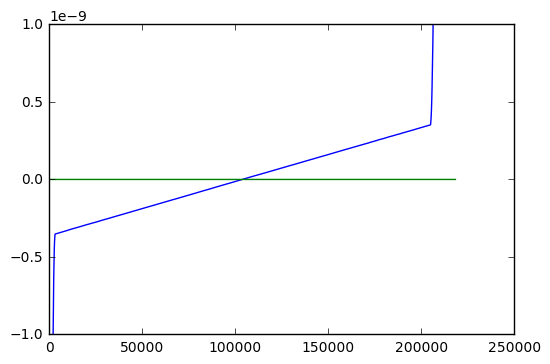

In [84]:
plt.plot(sorted(v[:,1].real))
plt.plot(np.zeros(len(all_nodes)))
plt.ylim(-0.000000001,0.000000001)
plt.savefig('5 second smallest eigenvalue.png')
plt.show()

In [86]:
result=np.zeros(len(all_nodes))
result[v[:,-1]>0]=1

In [120]:
g= nx.Graph()
g.add_nodes_from(list(set(video_set))[1:])

In [108]:
edge_pairs1 = []
for row in video_list:
    for i in range(20):
        try:
            math.isnan(row[i+1])
        except:
            edge_pairs1.append((row[0], row[i+1]))
            
g.add_edges_from(edge_pairs1)

In [109]:
path_length_undirect=np.ones(99500)*100
ct=0
for index, pair in enumerate(test_pairs):
    try:
        path_length_undirect[index]=nx.shortest_path_length(g, source=pair[0], target=pair[1])
    except: path_length_undirect[index] = 200

In [243]:
Counter(result)

Counter({0.0: 109261, 1.0: 109082})

In [244]:
hashmap_gtest = {}
clu0_nodes = []
clu1_nodes = []

for index, node in enumerate(g.nodes()):
    hashmap_gtest[node]=result[index]
    if result[index]==1:
        clu1_nodes.append(node)
    else:
        clu0_nodes.append(node)

In [245]:
clu0_edges = []
clu1_edges = []

for index0, row in enumerate(video_list):
    if hashmap_gtest[row[0]] == 0:
        for i in range(20):
            try:
                math.isnan(row[i+1])
            except:
                if hashmap_gtest[row[i+1]] == 0:
                    clu0_edges.append((row[0], row[i+1]))
                
    if hashmap_gtest[row[0]] == 1:
        for i in range(20):
            try:
                math.isnan(row[i+1])
            except:
                if hashmap_gtest[row[i+1]] == 1:
                    clu1_edges.append((row[0], row[i+1]))

In [246]:
g0=nx.Graph()
g0.add_nodes_from(list(set(clu0_nodes))[1:])
g0.add_edges_from(clu0_edges)
len(g0.nodes())

109261

In [247]:
g1=nx.Graph()
g1.add_nodes_from(list(set(clu1_nodes))[1:])
g1.add_edges_from(clu1_edges)
len(g1.nodes())

109083

In [248]:
path_length_0=np.ones(99500)*100
path_length_1=np.ones(99500)*100
path_length_2=np.ones(99500)*100

for index, pair in enumerate(test_pairs):
    try:
        path_length_0[index]=nx.shortest_path_length(g0, source=pair[0], target=pair[1])
    except: path_length_0[index] = 200

    try:
        path_length_1[index]=nx.shortest_path_length(g1, source=pair[0], target=pair[1]) 
    except: path_length_1[index] = 200

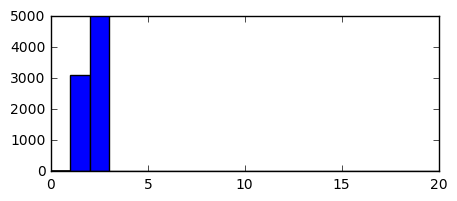

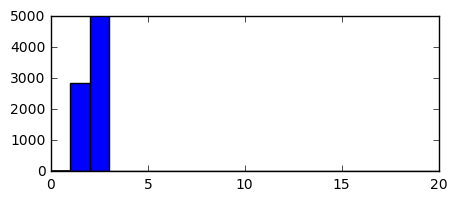

In [249]:
plt.figure(figsize=(5,2))
plt.hist(path_length_0,200)
plt.ylim(0,5000)
plt.xlim(0,20)
plt.show()
plt.figure(figsize=(5,2))
plt.hist(path_length_1,200)
plt.ylim(0,5000)
plt.xlim(0,20)
plt.show()

In [234]:
output = np.zeros(99500)
for index, length in enumerate(path_length_1):
    if path_length_1[index]<=10 or path_length_0[index]<=10:
        output[index]=1
    if path_length_undirect[index]==200:
        output[index]=1

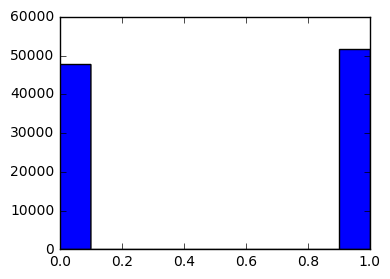

In [235]:
plt.figure(figsize=(4,3))
plt.hist(output)
plt.show()

In [236]:
pd.concat((test['edge_id'],DF(output.astype('int8'),columns=['edge_present'])),axis=1).to_csv('output.csv',index=False)

## this result achieved AUC of 0.78 on Kaggle